In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
torch.ones([6])

tensor([1., 1., 1., 1., 1., 1.])

In [4]:
torch.ones([6])/6

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [5]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [6]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 3., 3., 0., 1., 0.])

In [7]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1550, 0.1740, 0.1750, 0.1740, 0.1550, 0.1670])

In [8]:
counts

tensor([155., 174., 175., 174., 155., 167.])

In [11]:
# 将结果存储为32位浮点数以进行除法
counts_100000 = multinomial.Multinomial(100000, fair_probs).sample()
counts_100000 / 100000  # 相对频率作为估计值

tensor([0.1657, 0.1659, 0.1671, 0.1671, 0.1673, 0.1669])

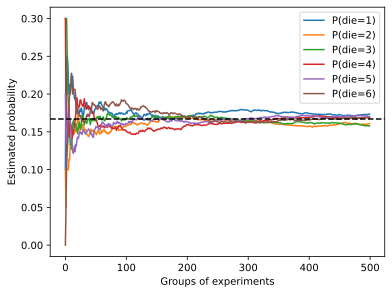

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();